In [12]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import  linkage,dendrogram

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import ElasticNet, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.metrics import classification_report, mean_absolute_error, r2_score, f1_score, accuracy_score,log_loss
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor, BaggingClassifier, BaggingRegressor, \
    RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from tqdm import tqdm
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [2]:
milk=pd.read_csv("milk.csv",index_col=0)
ss=StandardScaler().set_output(transform='pandas')
milk_scaled=ss.fit_transform(milk)

In [3]:
from sklearn.cluster import KMeans

clust=KMeans(random_state=25,n_clusters=3)
clust.fit(milk_scaled)
clust.labels_

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [5]:
clust=KMeans(random_state=25,n_clusters=2)
clust.fit(milk_scaled)
clust.inertia_

49.854659507364545

With inertia WSS

<Axes: title={'center': 'Scree Plot'}, xlabel='clusters', ylabel='inertia'>

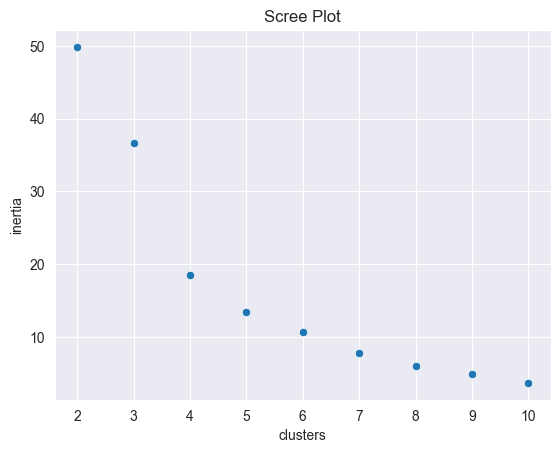

In [10]:
clusters=[2,3,4,5,6,7,8,9,10]
y=[]
for c in clusters:
    clust=KMeans(random_state=25,n_clusters=c)
    clust.fit(milk_scaled)
    y.append(clust.inertia_)
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.title("Scree Plot")
sns.scatterplot(x=clusters,y=y)


no. of clusters is 4 because 4 is the elbow point


Now with silhouette score

<Axes: title={'center': 'Scree Plot'}, xlabel='clusters', ylabel='Silhoutte Score'>

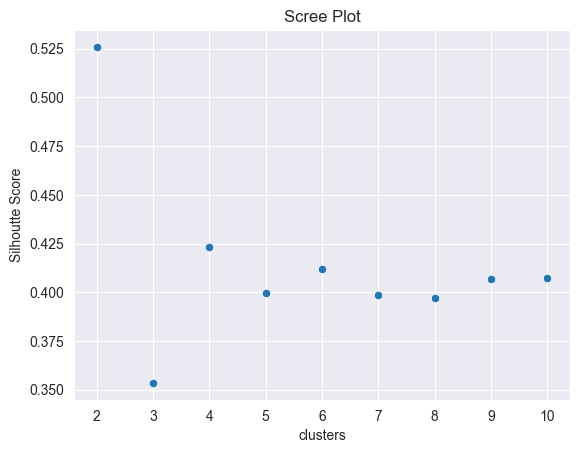

In [16]:
clusters=[2,3,4,5,6,7,8,9,10]
y=[]
for c in clusters:
    clust=KMeans(random_state=25,n_clusters=c)
    clust.fit(milk_scaled)
    y.append(silhouette_score(milk_scaled,clust.labels_))
plt.xlabel('clusters')
plt.ylabel('Silhoutte Score')
plt.title("Scree Plot")
sns.scatterplot(x=clusters,y=y)

cluster analysis

In [17]:
df_copy=milk.copy()
clust=KMeans(random_state=25,n_clusters=2)
clust.fit(milk_scaled)
df_copy['cluster']=clust.labels_
df_copy.groupby('cluster').mean()

,water,protein,fat,lactose,ash
cluster,,,,,
0,63.362500,10.412500,21.662500,1.975000,1.347500
1,85.158824,4.235294,4.964706,5.147059,0.635294


In [19]:
df_copy[df_copy['cluster']==0]

,water,protein,fat,lactose,ash,cluster
Animal,,,,,,
DOG,76.3,9.3,9.5,3.0,1.20,0
RABBIT,71.3,12.3,13.1,1.9,2.30,0
RAT,72.5,9.2,12.6,3.3,1.40,0
DEER,65.9,10.4,19.7,2.6,1.40,0
REINDEER,64.8,10.7,20.3,2.5,1.40,0
WHALE,64.8,11.1,21.2,1.6,1.70,0
SEAL,46.4,9.7,42.0,0.0,0.85,0
DOLPHIN,44.9,10.6,34.9,0.9,0.53,0


In [20]:
df_copy[df_copy['cluster']==1]

,water,protein,fat,lactose,ash,cluster
Animal,,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35,1
ORANGUTAN,88.5,1.4,3.5,6.0,0.24,1
MONKEY,88.4,2.2,2.7,6.4,0.18,1
DONKEY,90.3,1.7,1.4,6.2,0.40,1
HIPPO,90.4,0.6,4.5,4.4,0.10,1
CAMEL,87.7,3.5,3.4,4.8,0.71,1
BISON,86.9,4.8,1.7,5.7,0.90,1
BUFFALO,82.1,5.9,7.9,4.7,0.78,1
GUINEA PIG,81.9,7.4,7.2,2.7,0.85,1


In [21]:
nutrient = pd.read_csv("nutrient.csv", index_col=0)
ss = StandardScaler().set_output(transform='pandas')
nutrient_scaled = ss.fit_transform(nutrient)



89.24436770008958
63.9987197346273
42.400372873132625


<Axes: title={'center': 'Scree Plot'}, xlabel='clusters', ylabel='Silhoutte Score'>

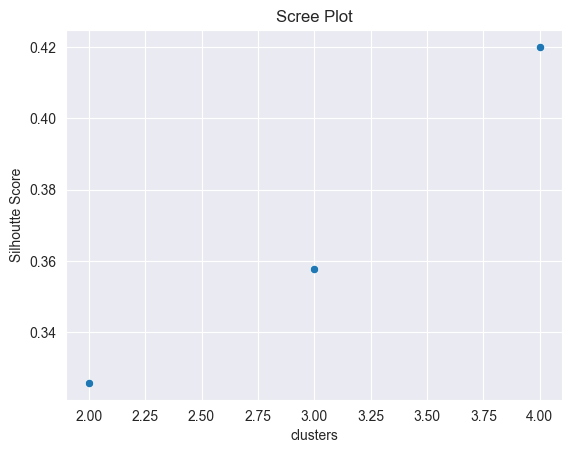

In [26]:
y=[]
for c in range(2,5):
    clust=KMeans(random_state=25,n_clusters=c)
    clust.fit(nutrient_scaled)
    print(clust.inertia_)
    y.append(silhouette_score(nutrient_scaled,clust.labels_))
plt.xlabel('clusters')
plt.ylabel('Silhoutte Score')
plt.title("Scree Plot")
sns.scatterplot(x=[2,3,4],y=y)



In [32]:
df_copy=nutrient.copy()

for c in range(2,5):
    clust=KMeans(random_state=25,n_clusters=c)
    clust.fit(nutrient_scaled)
    df_copy['cluster']=clust.labels_
    print(df_copy.groupby('cluster').mean())
    print("---------------------------------------------------------------------------")



             energy  protein        fat    calcium      iron
cluster                                                     
0        145.555556     19.0   6.444444  61.555556  2.338889
1        331.111111     19.0  27.555556   8.777778  2.466667
---------------------------------------------------------------------------
             energy    protein        fat     calcium      iron
cluster                                                        
0        114.000000  14.600000   5.000000  167.800000  3.280000
1        341.875000  18.750000  28.875000    8.750000  2.437500
2        163.928571  20.714286   7.714286   19.857143  2.028571
---------------------------------------------------------------------------
             energy    protein        fat     calcium      iron
cluster                                                        
0        151.666667  18.333333   7.666667  227.666667  1.666667
1        341.875000  18.750000  28.875000    8.750000  2.437500
2        163.928571  20.7142

In [33]:
df_copy[df_copy['cluster']==0]

,energy,protein,fat,calcium,iron,cluster
Food_Item,,,,,,
MACKEREL CANNED,155,16,9,157,1.8,0
SALMON CANNED,120,17,5,159,0.7,0
SARDINES CANNED,180,22,9,367,2.5,0


In [34]:
df_copy[df_copy['cluster']==1]

,energy,protein,fat,calcium,iron,cluster
Food_Item,,,,,,
BEEF BRAISED,340,20,28,9,2.6,1
BEEF ROAST,420,15,39,7,2.0,1
BEEF STEAK,375,19,32,9,2.6,1
LAMB LEG ROAST,265,20,20,9,2.6,1
LAMB SHOULDER ROAST,300,18,25,9,2.3,1
SMOKED HAM,340,20,28,9,2.5,1
PORK ROAST,340,19,29,9,2.5,1
PORK SIMMERED,355,19,30,9,2.4,1


In [35]:
df_copy[df_copy['cluster']==2]

,energy,protein,fat,calcium,iron,cluster
Food_Item,,,,,,
HAMBURGER,245,21,17,9,2.7,2
BEEF CANNED,180,22,10,17,3.7,2
CHICKEN BROILED,115,20,3,8,1.4,2
CHICKEN CANNED,170,25,7,12,1.5,2
BEEF HEART,160,26,5,14,5.9,2
BEEF TONGUE,205,18,14,7,2.5,2
VEAL CUTLET,185,23,9,9,2.7,2
BLUEFISH BAKED,135,22,4,25,0.6,2
CRABMEAT CANNED,90,14,2,38,0.8,2


In [37]:
df_copy[df_copy['cluster']==3]

,energy,protein,fat,calcium,iron,cluster
Food_Item,,,,,,
CLAMS RAW,70,11,1,82,6.0,3
CLAMS CANNED,45,7,1,74,5.4,3
